In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [64]:
#Before encoding Replacing missing values with mean first  - DONE!

# Columns that need encoding:
  # One-hot encoding:
    #Embarked - DONE!
    # Cabin -- Don't know what to do with cabin, maybe first only do encoding of string in the cabin name and not seat number
  # Label encoding:
    #Sex - DONE!


# Columns removed for now(as not needed):
  # Name
  # Ticket name(why would it matter what ticket number is)
  # Cabin name (will find a way to include this later)

# Feature Scaling needed:  - DONE!
  #Pclass
  #Age
  #sibSp
  #Parch
  #Fare

# Trained different models, used grid search and k-fold cross val to estimate accuracy

In [65]:

dataset = pd.read_csv('/content/drive/MyDrive/DataScience/Kaggle/competitions/titanic/train.csv',usecols=lambda x: x not in ["Ticket", "Cabin"])
test_dataset = pd.read_csv('/content/drive/MyDrive/DataScience/Kaggle/competitions/titanic/test.csv',usecols=lambda x: x not in ["Ticket", "Cabin"])


In [66]:
pd.set_option('display.max_columns', None)
def data_overview(df, head=5):
    print(" SHAPE ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" HEAD ".center(125,'-'))
    print(df.head(head))
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)

In [67]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

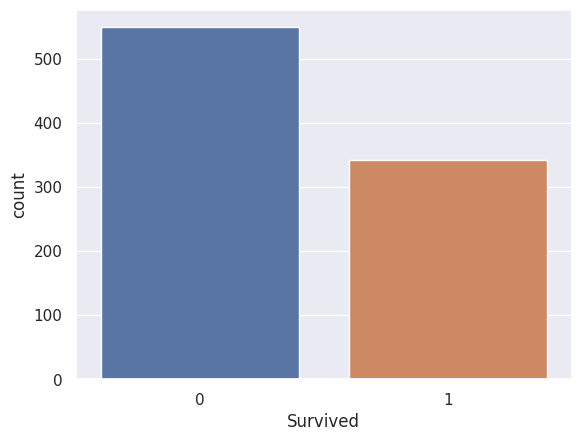

In [68]:
#DATA VISUALISATION
#dataset['Survived'].value_counts()
sns.set()

# #making a count plot for survived column

sns.countplot(dataset, x = 'Survived')


[[3 'Braund, Mr. Owen Harris' 'male' ... 0 7.25 'S']
 [1 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 'female' ... 0
  71.2833 'C']
 [3 'Heikkinen, Miss. Laina' 'female' ... 0 7.925 'S']
 ...
 [3 'Johnston, Miss. Catherine Helen "Carrie"' 'female' ... 2 23.45 'S']
 [1 'Behr, Mr. Karl Howell' 'male' ... 0 30.0 'C']
 [3 'Dooley, Mr. Patrick' 'male' ... 0 7.75 'Q']]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 

<Axes: >

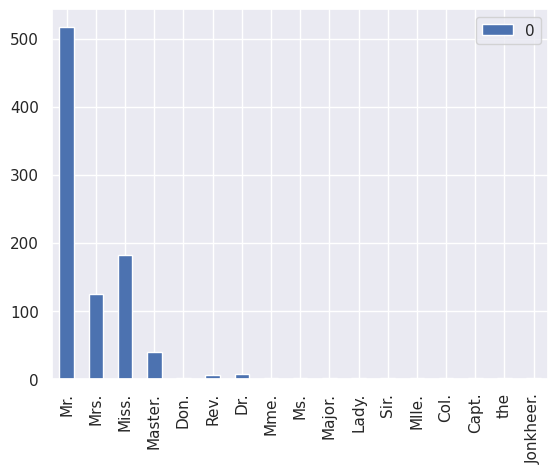

In [69]:

# Now, I will add one more feature which is the Names of the passengers and see if their title had
# any impact on their survival and if it can help me improve my score:


# will divide name in three categories: Ms, Mrs., Mr. or Doctor


X_org = dataset.iloc[:,2:].values

y_org = dataset.iloc[:,1].values
print(X_org)
print(y_org)

print(X_org[0,1])

pronoun=[]

pronoun_survived=[]
for pr in X_org[:,1]:
  pronoun.append(pr.split(',')[1].split(' ')[1])

#print(X_org[0,1].split(',')[1].split(' ')[1])

print(pronoun)

for i,j in enumerate(pronoun):
  #print(i)
  #print(y_org[i])
  if y_org[i]==1:
    pronoun_survived.append(j)


from matplotlib import pyplot as plt
from collections import Counter
letter_counts = Counter(pronoun)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

Percent of women survived:  73.61563517915309
Percent of men survived:  18.671454219030522


([<matplotlib.patches.Wedge at 0x781fb9da6380>,
 [Text(0.8851842224217835, 0.6530305447492809, 'Men'),
  Text(-0.8851843141334733, -0.6530304204338819, 'Women')],
 [Text(0.4828277576846091, 0.3561984789541532, '20.2%'),
  Text(-0.4828278077091672, -0.35619841114575373, '79.8%')])

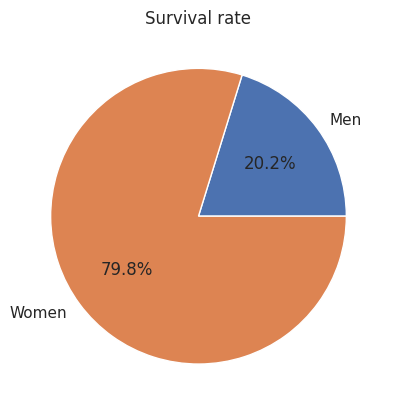

In [71]:
# Considering the proportion of Mr., Miss, Mrs. is very high. Let's only focus on these titles and see the discrepency in survival rate for men and women
missnum_s = 0
mrnum_s=0

missnum = 0
mrnum=0

#print(pronoun_survived)
for p in pronoun_survived:
  if p =='Miss.' or p == 'Mrs.':
    missnum_s+=1
  elif p == 'Mr.' or p == 'Master.':
    mrnum_s+=1

for p in pronoun:
  if p=='Miss.' or p == 'Mrs.':
    missnum+=1
  elif p=='Mr.' or p == 'Master.':
    mrnum+=1

survival_rate_w = missnum_s*100/missnum
survival_rate_m = mrnum_s*100/mrnum
print('Percent of women survived: ', survival_rate_w)
print('Percent of men survived: ', survival_rate_m)

# Representing in a pie - plot:

labels = 'Men', 'Women'
sizes = [survival_rate_m,survival_rate_w]

fig, ax = plt.subplots()
ax.set_title('Survival rate')
ax.pie(sizes, labels=labels, autopct='%1.1f%%')


# A strong discrepency in the survival rate between men and women!

In [72]:
dataset = pd.read_csv('/content/drive/MyDrive/DataScience/Kaggle/competitions/titanic/train.csv',usecols=lambda x: x not in ["Name", "Ticket", "Cabin"])
test_dataset = pd.read_csv('/content/drive/MyDrive/DataScience/Kaggle/competitions/titanic/test.csv',usecols=lambda x: x not in ["Name", "Ticket", "Cabin"])


X_org = dataset.iloc[:, 2:].values
y_org = dataset.iloc[:, 1].values
#X_test = test_dataset.iloc[:, 1:].values

In [73]:
print(X_org)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' nan ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [74]:
# To find outliers in the dataset


age_1=[]
age_0 = []

for i,j in X_org[:,2]:
  if y_org[i]==1:
    pronoun_survived.append(j)
#print(X_org[0,1].split(',')[1].split(' ')[1])

print(pronoun)

for i,j in enumerate(pronoun):
  #print(i)
  #print(y_org[i])
  if y_org[i]==1:
    pronoun_survived.append(j)




TypeError: ignored

In [75]:


from sklearn.model_selection import train_test_split

#Considering the number of customers in training set, slight variation in test size is fine.
X, X_test, y, y_test = train_test_split(X_org, y_org, test_size = 0.2, random_state = 0)

# Replacing missing values : categorical data with 'most frequent' and numerical data with 'mean'

from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_num.fit(X[:, 2:3])
X[:, 2:3] = imputer_num.transform(X[:, 2:3])

imputer_num_test = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_num_test.fit(X_test[:, 2:3])
X_test[:, 2:3] = imputer_num_test.transform(X_test[:, 2:3])


imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_cat.fit(X[:, 5:])
X[:, 5:] = imputer_cat.transform(X[:,5:])



test_imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_imputer_cat.fit(X_test[:, 5:])
X_test[:, 5:] = test_imputer_cat.transform(X_test[:,5:])

print(X[0,:])
print(X_test[0,:])
print(X_test[0,:])

#One-hot encoding of Embarked column: 6

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

X_test = np.array(ct.transform(X_test))

# S: 0 0 1
# C: 1 0 0
# Q: 0 1 0

print(X_test[0,:])
# Label Encoding of Sex
print(X[0,:])
print(X_test[0,:])


from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
X[:,4] = le_sex.fit_transform(X[:,4])

X_test[:,4] = le_sex.transform(X_test[:,4])
print(X[0,:])
print(X_test[0,:])
# Male: 1
# Female: 0

#SWAPED SEX AND PCLASS

#ORDER NOW IS: EMBARKED,SEX,PCLASS,AGE,SIBSP,PARCH,FARE

temp = X[:,3].copy()
X[:,3]  = X[:,4]
X[:,4] =  temp


temp_test = X_test[:,3].copy()
X_test[:,3]  = X_test[:,4]
X_test[:,4] =  temp_test



# Feature Scaling:

#Since I don't need feature scaling for Sex i.e. column: 4, I am re arranging 4 with 3 and then doing things
# Although its mainly needed for
# X[:,3]
# X[:,5]
# X[:,6]
# X[:,7]
# X[:,8]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# from sklearn.preprocessing import MinMaxScaler

# sc = MinMaxScaler()

X[:, 4:] = sc.fit_transform(X[:, 4:])

X_test[:, 4:] = sc.transform(X_test[:, 4:])

# TRAIN LOGISTICAL REGRESSION MODEL ON TRAINING SET
# print(y)

from sklearn.linear_model import LogisticRegression
#Create an object of logistic regression class i.e. create an instance:
logist_classifier = LogisticRegression(random_state = 0)
logist_classifier.fit(X, y)

y_pred_log = logist_classifier.predict(X_test)
# print(y_pred)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_log)
print(cm)
accuracy_score(y_test, y_pred_log)
print('Accuracy without k-fold crossval for Logistic regression: ', accuracy_score(y_test, y_pred_log) *100)


# Will do K-fold here


from sklearn.model_selection import cross_val_score

# We always want to apply this on training set
#List of accuracies on say 10 test folds (10 total different sets on which the data will be trained and tested)
accuracies = cross_val_score(estimator = logist_classifier, X = X, y = y, cv = 10)
#print(accuracies)
#% below gives the string of percentage
#We will also check the standard deviation of those accuracies, to check how different they are
print("Mean accuracy after k-fold crossval {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation {:.2f} %".format(accuracies.std()*100))

# KERNAL SVM:

from sklearn.svm import SVC
ksvm_classifier = SVC(kernel='rbf',random_state=0, C=1, gamma=0.11)  #Values from grid search below
ksvm_classifier.fit(X,y)
y_pred_ksvm = ksvm_classifier.predict(X_test)
#print(y_pred)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_ksvm)
print(cm)
print('Accuracy without k-fold crossval for Kernal SVM: ', accuracy_score(y_test, y_pred_ksvm) *100)


# Will do K-fold here


from sklearn.model_selection import cross_val_score

# We always want to apply this on training set
#List of accuracies on say 10 test folds (10 total different sets on which the data will be trained and tested)
accuracies = cross_val_score(estimator = ksvm_classifier, X = X, y = y, cv = 10)
#print(accuracies)
#% below gives the string of percentage
#We will also check the standard deviation of those accuracies, to check how different they are
print("Mean accuracy after k-fold crossval {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation {:.2f} %".format(accuracies.std()*100))

# DECISION TREE

from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dt_classifier.fit(X,y)
y_pred_dt = dt_classifier.predict(X_test)
#print(y_pred)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
accuracy_score(y_test, y_pred_dt)

print('Accuracy without k-fold crossval for Decision Tree: ', accuracy_score(y_test, y_pred_dt) *100)


# Will do K-fold here


from sklearn.model_selection import cross_val_score

# We always want to apply this on training set
#List of accuracies on say 10 test folds (10 total different sets on which the data will be trained and tested)
accuracies = cross_val_score(estimator = dt_classifier, X = X, y = y, cv = 10)
#print(accuracies)
#% below gives the string of percentage
#We will also check the standard deviation of those accuracies, to check how different they are
print("Mean accuracy after k-fold crossval {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation {:.2f} %".format(accuracies.std()*100))


# RANDOM FOREST - BEST ONE

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion = 'entropy', max_depth = 9,random_state = 0, n_estimators = 124) #n_estimators is the number of trees in the classifier

rf_classifier.fit(X,y)
y_pred_rf = rf_classifier.predict(X_test)
#print(y_pred)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
accuracy_score(y_test, y_pred_rf)
print('Accuracy without k-fold crossval for Random Forest: ', accuracy_score(y_test, y_pred_rf) *100)


# Will do K-fold here


from sklearn.model_selection import cross_val_score

# We always want to apply this on training set
#List of accuracies on say 10 test folds (10 total different sets on which the data will be trained and tested)
accuracies = cross_val_score(estimator = rf_classifier, X = X, y = y, cv = 10)
#print(accuracies)
#% below gives the string of percentage
#We will also check the standard deviation of those accuracies, to check how different they are
print("Mean accuracy after k-fold crossval {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation {:.2f} %".format(accuracies.std()*100))

# Will do grid search


from sklearn.model_selection import GridSearchCV
#List of different combinations of hyperparameters: c (say we check 0.25,0.5,0.75,1 for this c which is regularisation)
#Since I want to check two different kernels: rbf and linear, I take two dictionaries

parameters = [{'C':[0.25,0.5,0.75,1.0], 'kernel':['rbf'], 'gamma':[0.09,0.10,0.11,0.12,0.13,0.14]},
              {'C':[0.25,0.5,0.75,1.0], 'kernel': ['sigmoid'], 'gamma':[0.09,0.10,0.11,0.12,0.13,0.14]}]

parameters_rf = [{'max_depth':[9], 'criterion':['entropy'], 'n_estimators':[115,116,117,118,119,120,121,122,123,124,125,126]}]
#Scoring is the metrix with which we want to evaluate the performance of model with each of these hyperparameters combinations
#To evaluate with k-fold cross validation, we chose the number of train-test folds, cv=10
#n_jobs = -1 means all the processors on the machine will be used to run this for a faster run

grid_search = GridSearchCV(estimator = rf_classifier,
                           param_grid = parameters_rf,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

#Grid search is perfomed on the training set only (of which it takes some part as test set to determine the accuracys, without actually using the real test set(that we separated ourselves))
grid_search.fit(X,y)
#Determine the best accuracy (from k-fold cross val)
best_accuracy = grid_search.best_score_
#Determine which set of parameters lead to best accuracy here:

best_parameters = grid_search.best_params_

print("Best accuracy: {:.2f} %".format(best_accuracy*100))
print("Parameters with best accuracy: ", best_parameters)


[3 'female' 29.745183887915935 0 2 15.2458 'C']
[3 'male' 29.515174825174824 0 0 14.4583 'C']
[3 'male' 29.515174825174824 0 0 14.4583 'C']
[1.0 0.0 0.0 3 'male' 29.515174825174824 0 0 14.4583]
[1.0 0.0 0.0 3 'female' 29.745183887915935 0 2 15.2458]
[1.0 0.0 0.0 3 'male' 29.515174825174824 0 0 14.4583]
[1.0 0.0 0.0 3 0 29.745183887915935 0 2 15.2458]
[1.0 0.0 0.0 3 1 29.515174825174824 0 0 14.4583]
[[92 18]
 [18 51]]
Accuracy without k-fold crossval for Logistic regression:  79.88826815642457
Mean accuracy after k-fold crossval 78.52 %
Standard deviation 3.93 %
[[96 14]
 [21 48]]
Accuracy without k-fold crossval for Kernal SVM:  80.44692737430168
Mean accuracy after k-fold crossval 83.44 %
Standard deviation 2.73 %
[[93 17]
 [24 45]]
Accuracy without k-fold crossval for Decision Tree:  77.09497206703911
Mean accuracy after k-fold crossval 76.68 %
Standard deviation 3.12 %
[[103   7]
 [ 20  49]]
Accuracy without k-fold crossval for Random Forest:  84.91620111731844
Mean accuracy after k

In [76]:
# I will now train the model over all the dataset with similar parameters and predict the values for the given test data (which do not have any predicted values)

# Now, since I know Random Forest classifier works the best with 83.7 and lowest uncertainty:

X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values
X_test = test_dataset.iloc[:, 1:].values

In [77]:
#Considering the number of customers in training set, slight variation in test size is fine.
#X, X_test, y, y_test = train_test_split(X_org, y_org, test_size = 0.2, random_state = 0)

# Replacing missing values : categorical data with 'most frequent' and numerical data with 'mean'

from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_num.fit(X[:, 2:3])
X[:, 2:3] = imputer_num.transform(X[:, 2:3])

imputer_num_test = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_num_test.fit(X_test[:, 2:3])
X_test[:, 2:3] = imputer_num_test.transform(X_test[:, 2:3])


imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_cat.fit(X[:, 5:])
X[:, 5:] = imputer_cat.transform(X[:,5:])



test_imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_imputer_cat.fit(X_test[:, 5:])
X_test[:, 5:] = test_imputer_cat.transform(X_test[:,5:])

print(X[0,:])
print(X_test[0,:])
print(X_test[0,:])

#One-hot encoding of Embarked column: 6

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

X_test = np.array(ct.transform(X_test))

# S: 0 0 1
# C: 1 0 0
# Q: 0 1 0

print(X_test[0,:])
# Label Encoding of Sex
print(X[0,:])
print(X_test[0,:])


from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
X[:,4] = le_sex.fit_transform(X[:,4])

X_test[:,4] = le_sex.transform(X_test[:,4])
print(X[0,:])
print(X_test[0,:])
# Male: 1
# Female: 0

#SWAPED SEX AND PCLASS

#ORDER NOW IS: EMBARKED,SEX,PCLASS,AGE,SIBSP,PARCH,FARE

temp = X[:,3].copy()
X[:,3]  = X[:,4]
X[:,4] =  temp


temp_test = X_test[:,3].copy()
X_test[:,3]  = X_test[:,4]
X_test[:,4] =  temp_test



# Feature Scaling:

#Since I don't need feature scaling for Sex i.e. column: 4, I am re arranging 4 with 3 and then doing things
# Although its mainly needed for
# X[:,3]
# X[:,5]
# X[:,6]
# X[:,7]
# X[:,8]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# from sklearn.preprocessing import MinMaxScaler

# sc = MinMaxScaler()

X[:, 4:] = sc.fit_transform(X[:, 4:])

X_test[:, 4:] = sc.transform(X_test[:, 4:])



# RANDOM FOREST - BEST ONE FOUND FROM ABOVE ACCORDING TO ME

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion = 'entropy', max_depth = 9,random_state = 0, n_estimators = 124) #n_estimators is the number of trees in the classifier

rf_classifier.fit(X,y)
y_pred_rf = rf_classifier.predict(X_test)
print(y_pred_rf)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))





[3 'male' 22.0 1 0 7.25 'S']
[3 'male' 34.5 0 0 7.8292 'Q']
[3 'male' 34.5 0 0 7.8292 'Q']
[0.0 1.0 0.0 3 'male' 34.5 0 0 7.8292]
[0.0 0.0 1.0 3 'male' 22.0 1 0 7.25]
[0.0 1.0 0.0 3 'male' 34.5 0 0 7.8292]
[0.0 0.0 1.0 3 1 22.0 1 0 7.25]
[0.0 1.0 0.0 3 1 34.5 0 0 7.8292]
[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 

In [78]:
ID_test = test_dataset.iloc[:, 0].values

In [79]:
print(np.concatenate((ID_test.reshape(len(ID_test),1), y_pred_rf.reshape(len(y_pred_rf),1)), 1))

[[ 892    0]
 [ 893    0]
 [ 894    0]
 [ 895    0]
 [ 896    1]
 [ 897    0]
 [ 898    0]
 [ 899    0]
 [ 900    1]
 [ 901    0]
 [ 902    0]
 [ 903    0]
 [ 904    1]
 [ 905    0]
 [ 906    1]
 [ 907    1]
 [ 908    0]
 [ 909    0]
 [ 910    0]
 [ 911    1]
 [ 912    1]
 [ 913    0]
 [ 914    1]
 [ 915    1]
 [ 916    1]
 [ 917    0]
 [ 918    1]
 [ 919    0]
 [ 920    0]
 [ 921    0]
 [ 922    0]
 [ 923    0]
 [ 924    1]
 [ 925    0]
 [ 926    1]
 [ 927    0]
 [ 928    0]
 [ 929    0]
 [ 930    0]
 [ 931    1]
 [ 932    0]
 [ 933    0]
 [ 934    0]
 [ 935    1]
 [ 936    1]
 [ 937    0]
 [ 938    0]
 [ 939    0]
 [ 940    1]
 [ 941    1]
 [ 942    0]
 [ 943    0]
 [ 944    1]
 [ 945    1]
 [ 946    0]
 [ 947    0]
 [ 948    0]
 [ 949    0]
 [ 950    0]
 [ 951    1]
 [ 952    0]
 [ 953    0]
 [ 954    0]
 [ 955    1]
 [ 956    1]
 [ 957    1]
 [ 958    1]
 [ 959    0]
 [ 960    0]
 [ 961    1]
 [ 962    1]
 [ 963    0]
 [ 964    0]
 [ 965    0]
 [ 966    1]
 [ 967    0]
 [ 968    0]

In [80]:
rows = zip(ID_test, y_pred_rf)

newfilePath = 'titanic_prediction.csv'
import csv

with open(newfilePath, "w") as f:
    writer = csv.writer(f)
    writer.writerow(['PassengerId','Survived'])
    for row in rows:
        writer.writerow(row)

In [92]:
pred_dataset =  pd.read_csv('titanic_prediction.csv')

In [82]:
pred_data=pred_dataset.iloc[:,:].values
print(pred_data)

[['PassengerId' 'Survived']
 ['892' '0']
 ['893' '0']
 ['894' '0']
 ['895' '0']
 ['896' '1']
 ['897' '0']
 ['898' '0']
 ['899' '0']
 ['900' '1']
 ['901' '0']
 ['902' '0']
 ['903' '0']
 ['904' '1']
 ['905' '0']
 ['906' '1']
 ['907' '1']
 ['908' '0']
 ['909' '0']
 ['910' '0']
 ['911' '1']
 ['912' '1']
 ['913' '0']
 ['914' '1']
 ['915' '1']
 ['916' '1']
 ['917' '0']
 ['918' '1']
 ['919' '0']
 ['920' '0']
 ['921' '0']
 ['922' '0']
 ['923' '0']
 ['924' '1']
 ['925' '0']
 ['926' '1']
 ['927' '0']
 ['928' '0']
 ['929' '0']
 ['930' '0']
 ['931' '1']
 ['932' '0']
 ['933' '0']
 ['934' '0']
 ['935' '1']
 ['936' '1']
 ['937' '0']
 ['938' '0']
 ['939' '0']
 ['940' '1']
 ['941' '1']
 ['942' '0']
 ['943' '0']
 ['944' '1']
 ['945' '1']
 ['946' '0']
 ['947' '0']
 ['948' '0']
 ['949' '0']
 ['950' '0']
 ['951' '1']
 ['952' '0']
 ['953' '0']
 ['954' '0']
 ['955' '1']
 ['956' '1']
 ['957' '1']
 ['958' '1']
 ['959' '0']
 ['960' '0']
 ['961' '1']
 ['962' '1']
 ['963' '0']
 ['964' '0']
 ['965' '0']
 ['966' '1

In [95]:
# Plotting predicted and test dataset:
pred_dataset

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<Axes: xlabel='Survived', ylabel='count'>

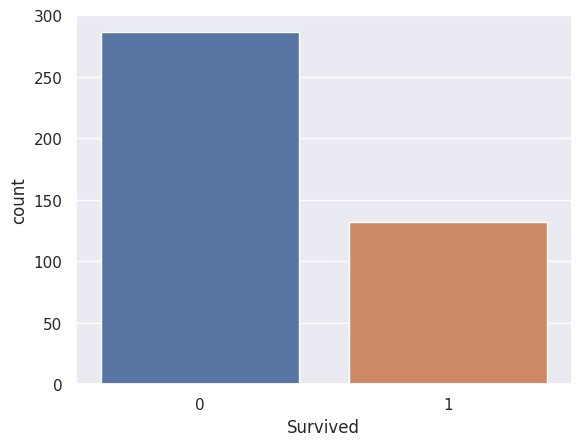

In [104]:
sns.set()
sns.countplot(pred_dataset, x = 'Survived')